Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
data=pd.read_csv("C:/Users/DELL/Downloads/train_s3TEQDk.csv")
test=pd.read_csv("C:/Users/DELL/Downloads/test_mSzZ8RL.csv")

In [3]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
data.shape

(245725, 11)

In [6]:
test.shape

(105312, 10)

In [7]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


Check missing values in train dataset

In [11]:
data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Check missing values in test dataset

In [12]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Dataframe with the percentagae of missing values in train dataset

In [14]:
missing_val1=pd.DataFrame(data.isnull().sum())
missing_val1=missing_val1.reset_index()
missing_val1=missing_val1.rename(columns={"index":"variables",0:"Missing percentage"})
#Calculate the percentage
missing_val1["Missing_%age"]=(missing_val1["Missing percentage"]/len(data))*100
missing_val1

,variables,Missing percentage,Missing_%age
0,ID,0,0.000000
1,Gender,0,0.000000
2,Age,0,0.000000
3,Region_Code,0,0.000000
4,Occupation,0,0.000000
5,Channel_Code,0,0.000000
6,Vintage,0,0.000000
7,Credit_Product,29325,11.934073
8,Avg_Account_Balance,0,0.000000
9,Is_Active,0,0.000000


Dataframe with the percentagae of missing values in test dataset

In [15]:
missing_val1=pd.DataFrame(test.isnull().sum())
missing_val1=missing_val1.reset_index()
missing_val1=missing_val1.rename(columns={"index":"variables",0:"Missing percentage"})
#Calculate the percentage
missing_val1["Missing_%age"]=(missing_val1["Missing percentage"]/len(test))*100
missing_val1

,variables,Missing percentage,Missing_%age
0,ID,0,0.000000
1,Gender,0,0.000000
2,Age,0,0.000000
3,Region_Code,0,0.000000
4,Occupation,0,0.000000
5,Channel_Code,0,0.000000
6,Vintage,0,0.000000
7,Credit_Product,12522,11.890383
8,Avg_Account_Balance,0,0.000000
9,Is_Active,0,0.000000


In [16]:
testfinal=test.copy()

Drop 'ID' variable from the train and test dataset

In [17]:
data.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [18]:
data.shape

(245725, 10)

In [19]:
test.shape

(105312, 9)

Impute and fill the missing values in 'Credit Product' variable for train dataset 

In [20]:
data=data.fillna(data['Credit_Product'].mode()[0])

Impute and fill the missing values in 'Credit Product' variable for test dataset 

In [21]:
test=test.fillna(test['Credit_Product'].mode()[0])

In [22]:
data.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [23]:
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


# Univariate Analysis

Analysis of each variable present in the train dataset

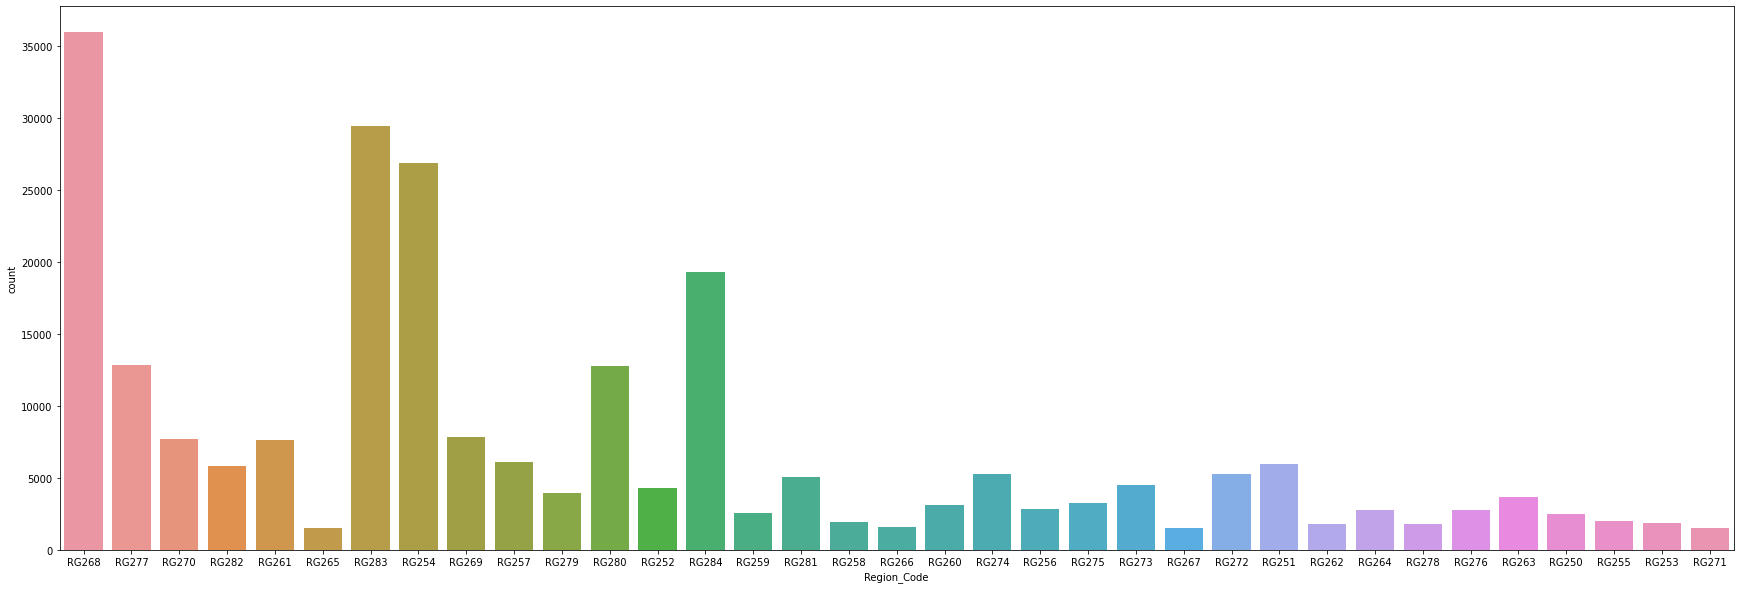

In [25]:
plt.figure(figsize=(30,10))
sns.countplot(x='Region_Code',data=data)
plt.show()

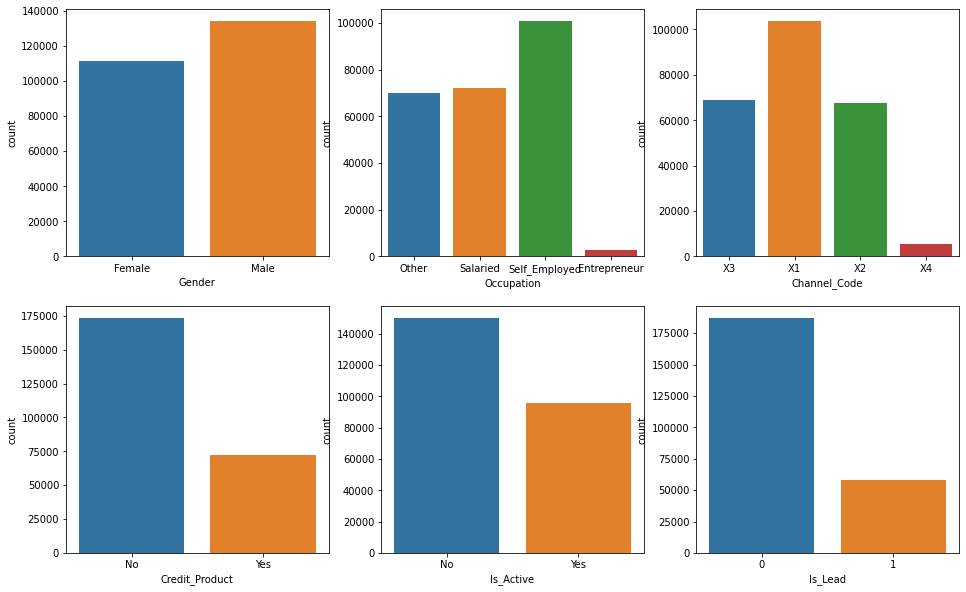

In [26]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.countplot(x='Gender',data=data,ax=ax[0][0])
sns.countplot(x='Occupation',data=data,ax=ax[0][1])
sns.countplot(x='Channel_Code',data=data,ax=ax[0][2])
sns.countplot(x='Credit_Product',data=data,ax=ax[1][0])
sns.countplot(x='Is_Active',data=data,ax=ax[1][1])
sns.countplot(x='Is_Lead',data=data,ax=ax[1][2])
warnings.filterwarnings('ignore')

From Above bar graphs we can see that our dataset is an unbalanced dataset

Variation of lead percentage with respect to gender

In [27]:
gender_islead=pd.crosstab(data.Gender,data.Is_Lead,normalize='index')
gender_islead

Is_Lead,0,1
Gender,,
Female,0.796419,0.203581
Male,0.734845,0.265155


Text(0.5, 1.0, 'Variation of lead percentage with respect to gender')

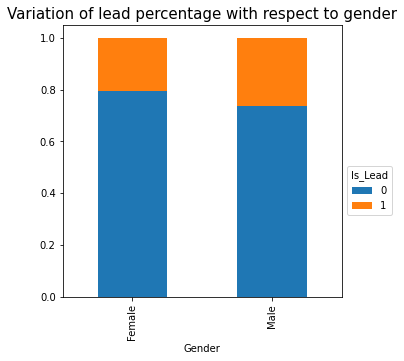

In [28]:
plt.rcParams['figure.figsize'] = [5, 5]
gender_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of lead percentage with respect to gender",fontsize=15)

Variation of lead percentage with respect to Region Code

In [29]:
rc_islead=pd.crosstab(data.Region_Code,data.Is_Lead,normalize='index')
rc_islead

Is_Lead,0,1
Region_Code,,
RG250,0.842548,0.157452
RG251,0.767899,0.232101
RG252,0.861876,0.138124
RG253,0.741119,0.258881
RG254,0.787146,0.212854
RG255,0.767592,0.232408
RG256,0.859150,0.140850
RG257,0.808228,0.191772
RG258,0.779600,0.220400


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Region Code')

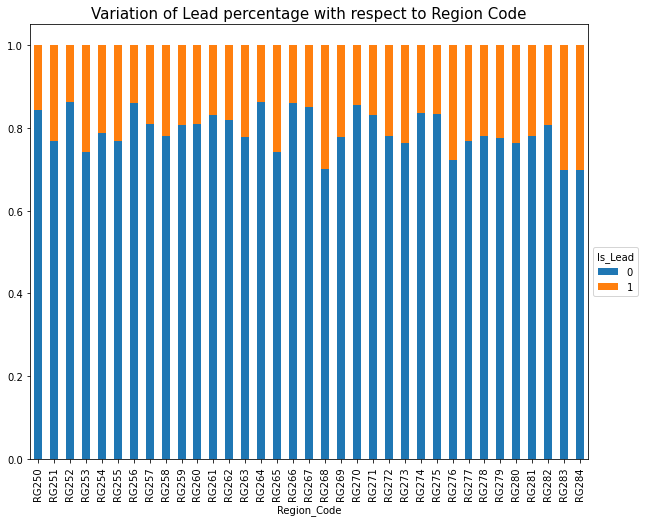

In [30]:
plt.rcParams['figure.figsize'] = [10,8]
rc_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of Lead percentage with respect to Region Code",fontsize=15)

Variation of Lead percentage with respect to Occupation Code

In [31]:
occ_islead=pd.crosstab(data.Occupation,data.Is_Lead,normalize='index')
occ_islead

Is_Lead,0,1
Occupation,,
Entrepreneur,0.339333,0.660667
Other,0.755048,0.244952
Salaried,0.840331,0.159669
Self_Employed,0.724035,0.275965


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Occupation')

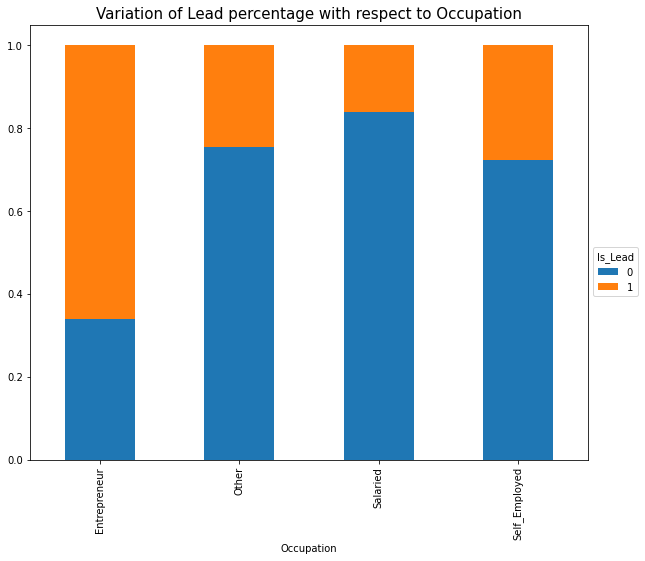

In [32]:
plt.rcParams['figure.figsize'] = [10,8]
occ_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of Lead percentage with respect to Occupation",fontsize=15)

Variation of Lead percentage with respect to Channel Code

In [33]:
chn_islead=pd.crosstab(data.Channel_Code,data.Is_Lead,normalize='index')
chn_islead

Is_Lead,0,1
Channel_Code,,
X1,0.908579,0.091421
X2,0.672105,0.327895
X3,0.632975,0.367025
X4,0.752200,0.247800


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Channel Code')

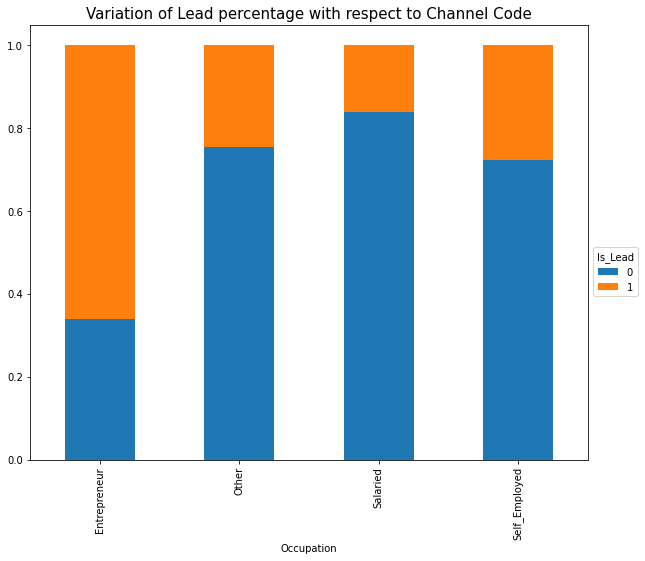

In [34]:
plt.rcParams['figure.figsize'] = [10,8]
occ_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of Lead percentage with respect to Channel Code",fontsize=15)

Variation of Lead percentage with respect to Credit Product

In [35]:
cc_islead=pd.crosstab(data.Credit_Product,data.Is_Lead,normalize='index')
cc_islead

Is_Lead,0,1
Credit_Product,,
No,0.795039,0.204961
Yes,0.685049,0.314951


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Credit Product')

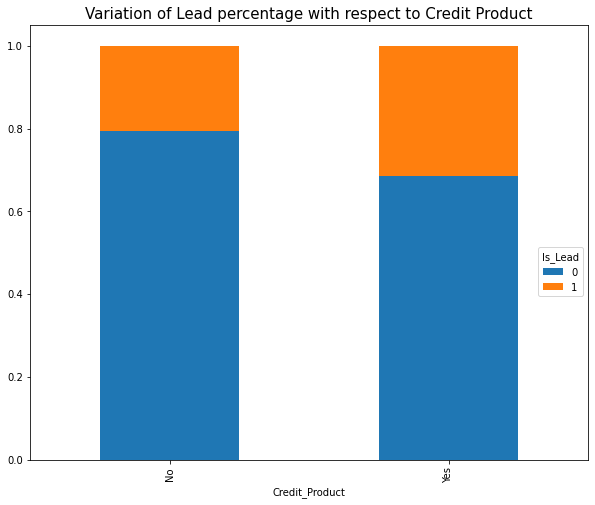

In [36]:
plt.rcParams['figure.figsize'] = [10,8]
cc_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of Lead percentage with respect to Credit Product",fontsize=15)

Distribution of Lead ratios with respect to Is_Active

In [37]:
isa_islead=pd.crosstab(data.Is_Active,data.Is_Lead,normalize='index')
isa_islead

Is_Lead,0,1
Is_Active,,
No,0.791849,0.208151
Yes,0.717033,0.282967


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Is_Active')

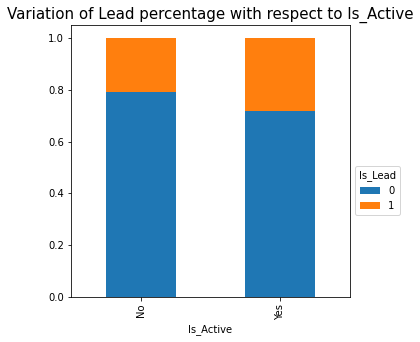

In [38]:
plt.rcParams['figure.figsize'] = [5,5]
isa_islead.plot.bar(stacked=True)
plt.legend(title='Is_Lead',bbox_to_anchor=(1,0.5))
plt.title("Variation of Lead percentage with respect to Is_Active",fontsize=15)

Distribution of Lead ratios with respect to age bins

<AxesSubplot:ylabel='Frequency'>

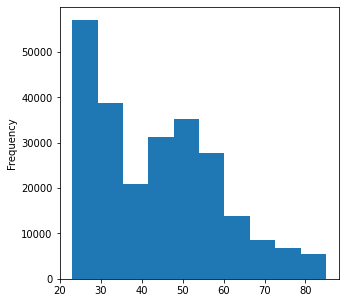

In [39]:
data["Age"].plot.hist()

In [40]:
age_bins = [20,30,40,50,60,70,80,90]
age_labels = ['20-30','30-40','40-50','50-60','60-70','70-80','80-90']
data['age_binned'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
data['age_binned'].value_counts()
age_bin = pd.crosstab(data.age_binned,data.Is_Lead,normalize='index')
age_bin

Is_Lead,0,1
age_binned,,
20-30,0.928735,0.071265
30-40,0.827338,0.172662
40-50,0.648039,0.351961
50-60,0.633769,0.366231
60-70,0.694616,0.305384
70-80,0.709751,0.290249
80-90,0.666095,0.333905


Text(0.5, 1.0, 'Variation of Lead percentage with respect to Age Bins')

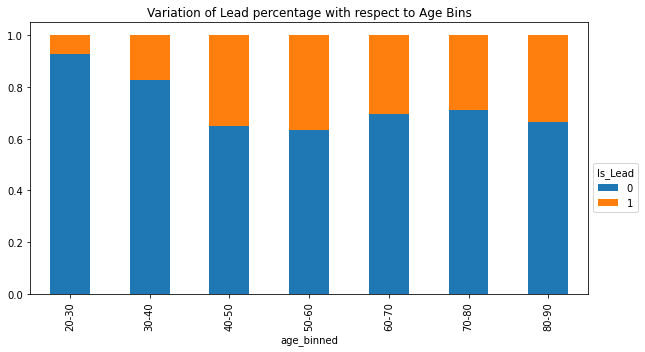

In [41]:
plt.rcParams['figure.figsize'] = [10,5]
age_bin.plot.bar(stacked=True)
plt.legend(title='Is_Lead',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Variation of Lead percentage with respect to Age Bins")

In [42]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,age_binned
0,Female,73,RG268,Other,X3,43,No,1045696,No,0,70-80
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0,20-30
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,50-60
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0,30-40
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0,20-30


# Multivariate Analysis

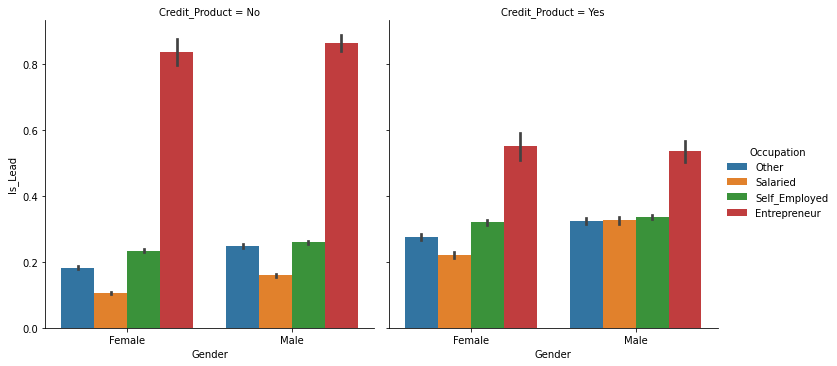

In [43]:
sns.catplot(x='Gender',y='Is_Lead',kind='bar',col='Credit_Product',data=data,hue='Occupation')

Distribution of numeric variables

Text(0, 0.5, 'Count')

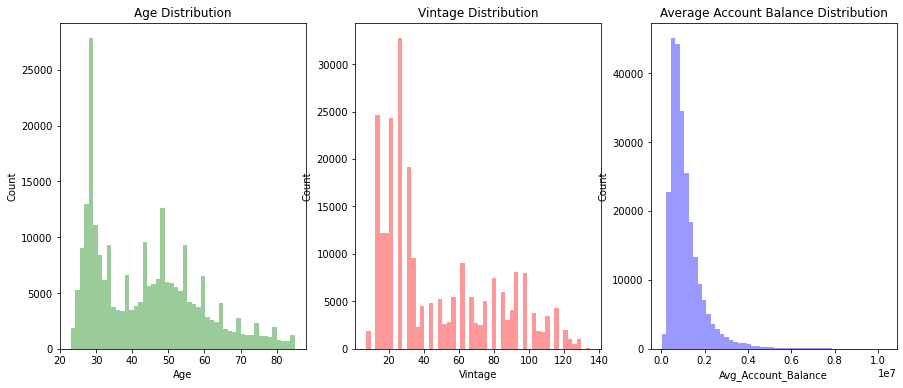

In [44]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.Age, kde=False, color="g", ax=axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Count')
sns.distplot(data.Vintage, kde=False, color="r", ax=axes[1]).set_title('Vintage Distribution')
axes[1].set_ylabel('Count')
sns.distplot(data.Avg_Account_Balance, kde=False, color="b",ax=axes[2]).set_title('Average Account Balance Distribution')
axes[2].set_ylabel('Count')

Convert labels into numeric form

In [45]:
scaled_features = data.copy()
label_names = ['Gender','Occupation','Region_Code','Channel_Code','Credit_Product','Is_Active']
le = LabelEncoder()
for i in label_names:
    data[i] = le.fit_transform(data[i])
    test[i] = le.fit_transform(test[i])

Correlation analysis using heatmap

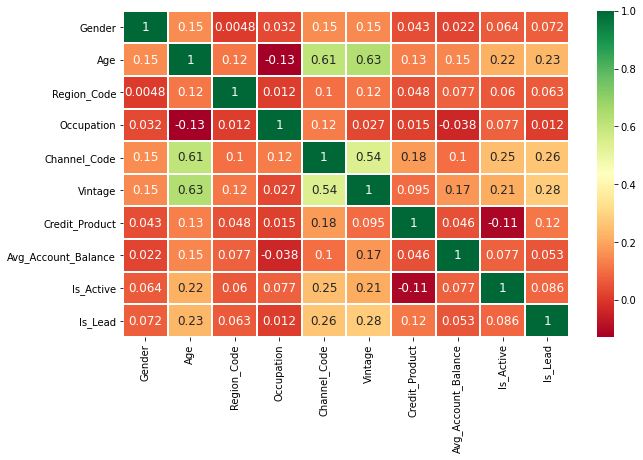

In [46]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [47]:
x=data.drop('Is_Lead',axis=1)

In [48]:
y=data['Is_Lead']

In [49]:
x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,age_binned
0,0,73,18,1,2,43,0,1045696,0,70-80
1,0,30,27,2,0,32,0,581988,0,20-30
2,0,56,18,3,2,26,0,1484315,1,50-60
3,1,34,20,2,0,19,0,470454,0,30-40
4,0,30,32,2,0,33,0,886787,0,20-30


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [51]:
x=x.drop('age_binned',axis=1)

Spitting of dataset into train and test dataset in the ratio of 70:30 percentage

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [53]:
print(x_train.shape)
print(x_test.shape)

(172007, 9)
(73718, 9)


Fit Decision Tree on the unbalanced dataset

In [54]:
dt_model_1=DecisionTreeClassifier(criterion="entropy")
dt_model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
dt_prediction_1=dt_model_1.predict_proba(x_test)

In [56]:
auc_score_dt1= roc_auc_score(y_test,dt_prediction_1[:,1])
print(auc_score_dt1)

0.6095480894211946


Fit XGBoost model on the unbalanced training dataset

In [57]:
xg_model_1=XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123,learning_rate=0.5)
xg_model_1.fit(x_train,y_train)

[16:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Predict probabilities for test dataset using XGBoost model

In [58]:
xg_prediction_1=xg_model_1.predict_proba(x_test)

In [60]:
auc_score_xg1= roc_auc_score(y_test,xg_prediction_1[:,1])
print(auc_score_xg1)

0.7851882791169218


As we have noticed above that the dataset is unbalanced, So i have applied SMOTE technique to balance the dataset

In [61]:
ros =imblearn.over_sampling.RandomOverSampler(random_state=42)
x_train_over, y_train_over = ros.fit_resample(x_train, y_train)

Fit Decision Tree on balanced dataset

In [62]:
dt_model_2=DecisionTreeClassifier(criterion="entropy")
dt_model_2.fit(x_train_over,y_train_over)

DecisionTreeClassifier(criterion='entropy')

In [63]:
dt_prediction_2=dt_model_2.predict_proba(x_test)

In [64]:
auc_score_dt2= roc_auc_score(y_test,dt_prediction_2[:,1])
print(auc_score_dt2)

0.6066813510448588


Fit XGBoost on balanced dataset

In [65]:
xg_model_2=XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123,learning_rate=0.5)
xg_model_2.fit(x_train_over,y_train_over)

[16:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [66]:
xg_prediction_2=xg_model_2.predict_proba(x_test)

In [67]:
auc_score_xg2= roc_auc_score(y_test,xg_prediction_2[:,1])
print(auc_score_xg2)

0.7835974412538375


Used XGBoost model fitted on unbalanced dataset because it has highest ROC_AUC_SCORE

In [70]:
probabilities=xg_model_1.predict_proba(test)
probabilities

array([[0.97167903, 0.02832096],
       [0.74066937, 0.25933063],
       [0.79175365, 0.20824632],
       ...,
       [0.36645317, 0.6335468 ],
       [0.54742765, 0.45257238],
       [0.9269279 , 0.07307207]], dtype=float32)

Convert the array of probailities into a dataframe

In [71]:
df= pd.DataFrame(probabilities, columns = ['Probabilities:0','Probabilities:1'])
df.head()

,Probabilities:0,Probabilities:1
0,0.971679,0.028321
1,0.740669,0.259331
2,0.791754,0.208246
3,0.969506,0.030494
4,0.974784,0.025216


In [72]:
df1=testfinal['ID']
df2=df['Probabilities:1']

Concatenate both the dataframe

In [73]:
final_dataframe=pd.concat([df1,df2],join='outer',axis=1)

In [74]:
final_dataframe.head()

,ID,Probabilities:1
0,VBENBARO,0.028321
1,CCMEWNKY,0.259331
2,VK3KGA9M,0.208246
3,TT8RPZVC,0.030494
4,SHQZEYTZ,0.025216


Rename the column 

In [75]:
final_dataframe.rename(columns={'Probabilities:1':'Is_Lead'}, inplace = True)

Save the prediction file into CSV format

In [76]:
final_dataframe.to_csv("New_Final Prediction.csv",index=False)